# Cross Validation Motivation
The purpose of cross validation is two fold:
1. To build a model on limited data
2. To find the optimal hyperparameters for your model

We will be demonstrating both these uses in this tutorial

# Uploading the dataset and simple preprocessing

**Important note:** if at any point you cannot download a Python package in this tutorial, run the command "!pip install" with the package name right after. For example, if you want to install the Python package *pandas* write "!pip install pandas" and run the cell.

Firstly let's consider a dataset where we don't have enough data for a traditional train/test split.
Download the Heart Failure dataset from https://www.kaggle.com/andrewmvd/heart-failure-clinical-data.

Ultimately the task is to predict death from heart failure when given multiple features like age, sex, whether or not a person has diabetes, whether or not a person smokes, and other biological features.

This is a binary classification problem, with death represented as (1) and no death represented as (0).

Upon running the cell below you will be prompted to upload your dataset.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
#Pandas is a popular Python library that works with datasets. We will use this library to load the heart failure dataset
import pandas as pd

#Read in the csv dataset as HF
HF=pd.read_csv("heart_failure_clinical_records_dataset.csv")
#Tip: if you start typing "hea" and then press the "tab" key, Python will autofill the dataset name
#Note: the csv dataset name must be enclosed in ""

#Specify Pandas options so that we can see all the rows and columns of the dataset clearly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Inspect the first 10 rows of the dataset
HF.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Let's inspect some important features of this dataset.
1. How many missing values in this dataset?
2. What is the distribution of deaths/no deaths?
3. Are there any variables that should be removed?

In [ ]:
#See if there are any missing values in the dataset
HF.isnull().sum()
#As we see a value for 0 for all columns, we conclude that there are no missing values in this dataset

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#Now let's check the distribution of deaths/no deaths
round(HF["DEATH_EVENT"].value_counts(normalize=True),2)

0    0.68
1    0.32
Name: DEATH_EVENT, dtype: float64

Important note: Hence there are about 32% of individiuals in this dataset who died from heart disease. Thus, this dataset is unbalanced and we need to take this into consideration when evaluating a model.

Definition of response variable: whether the patient died during the followup period.

One of the variables is time which represents the followup period. Intuitively we would expect the length of followup period to be highly correlated with the response variable. Hence we will remove this variable from the analysis

In [ ]:
#Define a new dataset df which excludes the time variable. This is the dataset
# that we will be modeling from
df=HF.drop(["time"],axis=1)
#Inspect the number of observations and number of total variables in the dataset
df.shape

(299, 12)

From 13 total variables (including the response variable) we have 12 variables (including the response variable). Furthermore there are 299 people in this
dataset.

In [ ]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


Let's check if there's any evidence for multicollinearity in the dataset

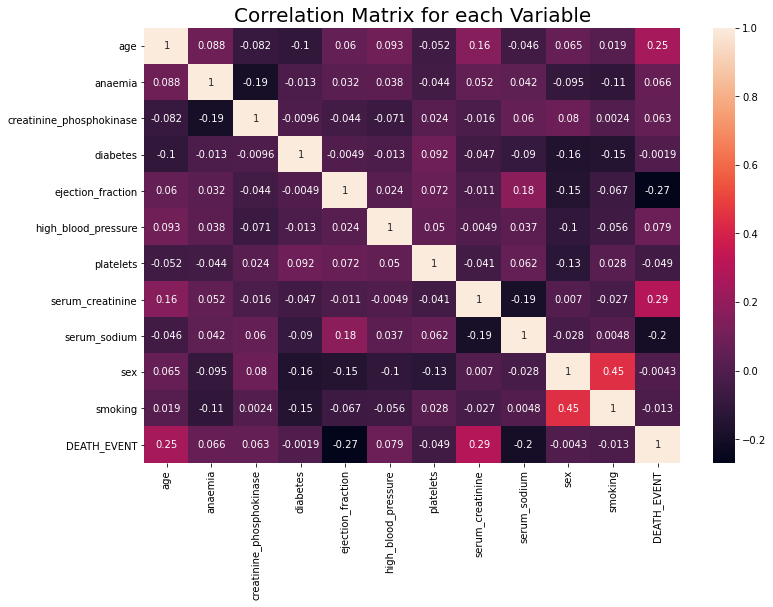

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,8))
corrMatrix=df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlation Matrix for each Variable",fontsize=20)
plt.show()

#Cross Validation Application #1: Building a model on limited data

For this application of cross validation, we will build a simple logistic regression model to predict the probability of a person dying from heart failure. For each person the model will output the probability of dying from heart failure. If that probability is greater than a certain cutoff then the model will classify that person as a death from heart failure.

Note: Choosing the right cutoff is a complicated and interesting topic that takes into account the false positive / false negative rates for each classification cutoff value. This is a topic for another tutorial so for the purposes of this cross validation tutorial we will use a probability cutoff of 0.5. For all individuals in the dataset, if the model outputs a probability of death that is greater than 0.5 we will classify that person as a death from heart disease.

## What if we considered the traditional train/test split method?

In [ ]:
#To make the code less cumbersome, let's denote the feature variables and response variable in separate forms
features=df.drop(["DEATH_EVENT"],axis=1)
response=df["DEATH_EVENT"]


#Import the library that will randomly divide our data into training and testing data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,response,test_size=0.3,random_state=42)
#We want to create training and testing splits of the features and the response variable. We will apply a test_size of 0.3, meaning that we want our
#testing data to be 30% of our original data. The random_state argument is a seed value which will randomly partition the data into training and testing.
#This argument can be any number you like.


Let's see how much data is in our training and testing partitions

In [ ]:
print("The number of people in our training dataset is: "+str(X_train.shape[0]))
print("The number of people in our testing dataset is: "+str(X_test.shape[0]))

The number of people in our training dataset is: 209
The number of people in our testing dataset is: 90


See how many deaths are in the training and testing dataset

In [ ]:
print("The number of deaths (positive cases) in our training dataset is: "+str(round(((y_train.sum())/len(y_train))*100,2))+"%")
print()
print("The number of deaths (positive cases) in our testing dataset is: "+str(round(((y_test.sum())/len(y_test))*100,2))+"%")

The number of deaths (positive cases) in our training dataset is: 28.23%

The number of deaths (positive cases) in our testing dataset is: 41.11%


Let's build the model

In [ ]:
#Import the logistic regression framework
from sklearn.linear_model import LogisticRegression

#Metrics is the library which helps us determine model performance. The metric
#we will be using is balanced accuracy, which is like total accuracy but accounts
#for the imbalance of death/nondeath in our data
from sklearn import metrics

#We will apply an argument of max_iter of 1000 which tells the function that if
#the algorithm cannot find an optimal solution within those 1000 iterations then it should terminate the program and return an error
classifier=LogisticRegression(max_iter=1000)

#Train our logistic regression model on the training data
classifier.fit(X_train,y_train)

#Evaluate the performance of the trained logistic regression model on the testing data
predictions=list(classifier.predict(X_test))
actual=list(y_test)

#Calculate the balanced accuracy score of our testing data
AccScore=metrics.balanced_accuracy_score(actual, predictions)
print("The model's balanced accuracy on the testing data is: "+str(round(AccScore*100,2))+"%")

The model's balanced accuracy on the testing data is: 60.68%


There are multiple problems with this approach:

1. 299 people as an overall dataset is not a lot of people. Furthermore, to build the model we are again reducing the amount of people to learn from to 299*0.7= about 209, which is even less.

2. The balanced accuracy of the model is highly dependent on the random seed we use. For example, consider the following:


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,response,test_size=0.3,random_state=42)
print("The number of deaths (positive cases) in our training dataset is: "+str(round(((y_train.sum())/len(y_train))*100,2))+"%")
print()
print("The number of deaths (positive cases) in our testing dataset is: "+str(round(((y_test.sum())/len(y_test))*100,2))+"%")
print()
classifier=LogisticRegression(max_iter=1000)

#Train our logistic regression model on the training data
classifier.fit(X_train,y_train)

#Evaluate the performance of the trained logistic regression model on the testing data
predictions=list(classifier.predict(X_test))
actual=list(y_test)

#Calculate the balanced accuracy score of our testing data
AccScore=metrics.balanced_accuracy_score(actual, predictions)
print("The model's balanced accuracy on the testing data is: "+str(round(AccScore*100,2))+"%")

The number of deaths (positive cases) in our training dataset is: 28.23%

The number of deaths (positive cases) in our testing dataset is: 41.11%

The model's balanced accuracy on the testing data is: 60.68%


Here we see that there there's a greater proportion of positive cases in the testing dataset than in the training dataset. Hence, the classifier is not given enough data to adequately learn what features contribute to a death classification. It's like walking in for a calculus test and spending less than a third of your time reviewing limits but about 40% of your exam is on something unrelated like integration by parts. As a result you will perform poorly on your exam because you didn't study the right material.

Now consider a different random seed:

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,response,test_size=0.3,random_state=70)
print("The number of deaths (positive cases) in our training dataset is: "+str(round(((y_train.sum())/len(y_train))*100,2))+"%")
print()
print("The number of deaths (positive cases) in our testing dataset is: "+str(round(((y_test.sum())/len(y_test))*100,2))+"%")
print()
classifier=LogisticRegression(max_iter=1000)

#Train our logistic regression model on the training data
classifier.fit(X_train,y_train)

#Evaluate the performance of the trained logistic regression model on the testing data
predictions=list(classifier.predict(X_test))
actual=list(y_test)

#Calculate the balanced accuracy score of our testing data
AccScore=metrics.balanced_accuracy_score(actual, predictions)
print("The model's balanced accuracy on the testing data is: "+str(round(AccScore*100,2))+"%")

The number of deaths (positive cases) in our training dataset is: 33.49%

The number of deaths (positive cases) in our testing dataset is: 28.89%

The model's balanced accuracy on the testing data is: 65.32%


Here we see the opposite: the training dataset had a greater percentage of deaths than did the testing dataset. Hence we would expect better balanced accuracy for the testing dataset.

Thus, even though our model performed well on this simple dataset for the testing partition, because of the sensitivity to the random seed it may not generalize well to other testing partitions.

Thus, we want to come up with a method that will use as much of our limited data as possible but is not sensitive to how we split the data into training and testing

## Implementing K-Fold Cross Validation

Recall that we are working with the *df* dataset, which is the entire dataset but with the time variable removed.

The benefit of cross validation is that rather than doing a training and testing split, which reduces the amount of data we can work with (building a model with 210 records), we will build a model which uses the entire dataset (299 records).

Note: We do not have a testing dataset in this method. Once we perform cross validation we will get a *cross validated* balanced accuracy rate. This will be our "test" evaluation metric.

In [ ]:
#We will implement the KFold module which will allow us to do K-Fold Cross Validation
from sklearn.model_selection import KFold

#We will call the KFold object. It has the following specified arguments
#1. n_splits: How many folds do you want?
#2. Do you want to shuffle your data before you perform the k-fold partitioning?
#3. If you want to shuffle your data, provide a random seed to help shuffle your data.
kf=KFold(n_splits=10,shuffle=True,random_state=295)

#When doing k-fold cross validation we will get k test datasets. Let's see what data each test dataset includes.
foldNumber=1
for train_set,test_set in kf.split(X=features):
  print("Row indices of the testing dataset from fold: "+str(foldNumber))
  print(test_set)
  print()
  print("Number of observations in the test dataset is: "+str(test_set.shape[0]))
  print()
  foldNumber+=1

For example, the first testing dataset is the list of indices specified under Fold:1. This means that from our dataset df the first observation of the first testing dataset is the 0th row of our df dataset. See the cell below for what this actually means

In [ ]:
#Get the first observation from the first test dataset (from fold 1)
df.iloc[0]

Build the Cross Validated Logistic Regression Model. These are the testing balanced accuracies for each fold. To get the overall cross validated testing balanced accuracy we will average the balanced testing accuracies across all folds

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
clf=LogisticRegression(random_state=0,max_iter=1000)
results = cross_val_score(clf, features, response, cv=kf,scoring="balanced_accuracy")
for i in range(0,10):
  print("The testing balanced accuracy for the test partition of the "+str(i+1)+" fold: "+str(round(results[i]*100,2))+"%")
print()
print()
print("The Cross Validated balanced accuracy is: "+str(round(results.mean(),2))+ " with a standard deviation of: "+str(round(np.std(results),2)))

Hence, our **Cross Validated balanced accuracy = 63%**. This balanced accuracy is determined from testing **all** the data, rather than testing a subset of our total data.

## Implementing Repeated K-Fold Cross Validation

In order to have more confidence in our cross validated performance metric, we can run K-Fold cross validation multiple times.
For example, if we want to run a 5 fold cross validation 3 times we will run the 5 fold CV once and get the average balanced accuracy, run it once more and get the average balanced accuracy, and run it once again and get the average balanced accuracy. We then average all three balanced accuracies and get the overall repeated 5-fold cross validation balanced accuracy.

In [ ]:
from sklearn.model_selection import RepeatedKFold
#Create a repeated K-Fold object which contains
#1. How many folds you want
#2. How many times you want to run the k-fold cross validation
#3. A random seed that has the sole purpose of shuffling your data.

#Note that the purpose of the random seed in cross validation is different than
#in the traditional train/test split.

rkf=RepeatedKFold(n_splits=10,n_repeats=3,random_state=295)

#Create the classifier
clf=LogisticRegression(random_state=0,max_iter=1000)

#Get the n_splits*n_repeats balanced accuracy results
results = cross_val_score(clf, features, response, cv=rkf,scoring="balanced_accuracy")
results=list(results)

i=1
n_splits=10
n_repeats=3
start=0
end=n_splits-1
while i<=n_repeats:
   avg_balancedAcc=np.mean(results[start:end])
   print("The average balanced accuracy for iteration: "+str(i)+" of 10 fold cross validation is: "+str(round(avg_balancedAcc,2)))
   start=end+1
   end+=n_splits-1
   i+=1

print("%0.2f accuracy with a standard deviation of %0.2f" % (np.mean(results), np.std(results)))

Notice that the balanced accuracy is the same of that from K-Fold cross validation but the standard deviation has come down. Hence we are more confident in our cross validated balanced accuracy

## Stratified K-Fold Cross Validation

Recall that a problem we have with unbalanced data is that if our data is too unbalanced then our model may not perform optimally. For example, if we have 90% non-deaths in our dataset and only 10% deaths then the classifier will not be able to predict deaths well. While this issue is mitigated in K-Fold cross validation we can introduce another condition that every fold in the K-Fold cross validation must contain roughly equal proportions of deaths. We can easily implement this in Python as follows:

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=295)
results = cross_val_score(clf, features, response, cv=skf,scoring="balanced_accuracy")
for i in range(0,10):
  print("The testing balanced accuracy for the test partition of the "+str(i+1)+" fold: "+str(round(results[i]*100,2))+"%")

print("The Cross Validated balanced accuracy is: "+str(round(results.mean(),2))+ " with a standard deviation of: "+str(round(np.std(results),2)))

We see that the percentage of deaths in each testing fold isn't exactly the same. However they are close.

In [ ]:
print("The Cross Validated balanced accuracy is: "+str(round(results.mean(),2))+ " with a standard deviation of: "+str(round(np.std(results),2)))

Here we get approximately the same balanced accuracy cross validated score but with a lower standard deviation. Hence we have more confidence in our accuracy score here.

## Implementing Repeated Stratified K-Fold Cross Validation

Just like with repeated K-Fold cross validation, we can do the same with stratified cross validation

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=295)
clf=LogisticRegression(random_state=0,max_iter=1000)
results = cross_val_score(clf, features, response, cv=rskf,scoring="balanced_accuracy")
#print(results)
print("%0.2f accuracy with a standard deviation of %0.2f" % (results.mean(), results.std()))
#Note that we get slightly higher accuracy here.

# Cross Validation Application #2: Using for Hyperparameter Optimization

Hyperparameters are model settings that help the Python algorithm find the optimal model for your algorithm.
For example, so far we have been using logistic regression and every time we specified a *max_iter* parameter which indicates how long the LogisticRegression function must run for to find the optimal model for our data. This *max_iter* value is a hyperparameter.

Hyperparameters are extremely important in model building. In this example,
1. If we choose a *max_iter* value that is too small the algorithm will either return an error or give us a model that is not optimized to our data.
2. If we choose a *max_iter* value that is too large then the algorithm will take longer than necessary to find the optimal model for our data. On larger and larger datasets that take longer to process, having too large of a *max_iter* value is incredibly wasteful.

So how do we come up with the right hyperparameter values? By using Cross Validation

Since there aren't many hyperparameters we can play with in Logistic Regression, let's consider the XGBoost classification algorithm. This is an adaptive tree-based algorithm (like a decision tree) that can be used for both regression and classification problems. There are many hyperparameters that are associated with XGBoost but we will focus on the following three:
1. **n_estimators**: How many decision trees should be created during XGBoost? A small number of trees will underfit our data and we won't be able to classify correctly.
2. **max_depth**: How deep should each tree be? A deeper tree is more complex, which has the potential to overfit and to be computationally expensive. A shallow tree will underfit and yield poor classification results
3.**learning_rate:** This is a separate discussion entirely but essentially too low of a learning rate means the algorithm will take too long to find the optimal solution. Too high of a learning rate means the algorithm may entirely miss the solution.

We will first set up a grid of possible values for our hyperparameters. We define this grid and provide those possible values

In [ ]:
parameters = {
    'max_depth': [6, 8,10,12],
    'n_estimators': [25,50,70, 85],
    'learning_rate': [0.1,0.15,0.25, 0.5, 0.7]
}

Essentially we want to try different combinations of these hyperparameters to see how high of a balanced accuracy we can get. We will be building a separate model for each combination of hyperparameters.

Once we find the model that gives us the highest balanced accuracy we save those model's hyperparameters and call those the **best/optimized hyperparameters**

How do we come up with the total number of hyperparameter combinations? We will do a simple permutation:
1. There are 4 possible values for max_depth
2. There are 4 possible values for n_estimators
3. There are 5 possible values for learning_rate

Hence there are  4 * 4 * 5= 80 combinations of hyperparameter settings.

Note: There are different ways of coming up with hyperparameter optimizations. This is the brute force way, which is the easiest to understand. However there are other methods such as randomized search and Bayesian optimization, which rely more heavily on probability distributions.

In order to get better hyperparameter optimization we can introduce cross validation. Essentially for each fold we will be running the total number of hyperparameter combinations. In this example with the hyperparameter combinations defined above, if we are doing a 5-fold CV hyperparameter optimization then for each of the 5 fold we will be building 80 models. This will amount to 400 total model fits.

We will then find the model with the highest balanced accuracy, save that model's hyperparameters and call those the **best/optimized hyperparameters**.

Let's now apply CV Hyperparameter optimization to our data using an XGBoost model

In [ ]:
#Import the XGBoost classifier object
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


xgbmodel=XGBClassifier()

#This will be the object where Python will perform the optimization. We specify the following:
#1. estimator: What model you want to use? Here we are using an XGBoost model
#2. param_grid: the possible values for our hyperparameters. We defined this above.
#3. scoring: What model evaluation metric do you want to use?
#4. n_jobs: has to do with parallel processing and computational speed. Since we don't have that much data we will set this to 1
#5. cv: How many folds do you want to use in this hyperparameter optimization? We will set this to 10 for consistency
grid_search = GridSearchCV(
    estimator=xgbmodel,
    param_grid=parameters,
    scoring='balanced_accuracy',
    n_jobs=1,
    cv=10,
    verbose=4
)

Note:
1. We are running 80 combinations of hyperparameters on each fold. Hence we are running 400 models.
2. For the cv argument you can also provide an object. For example, if you want to do stratified 10-Fold cross validation you can define a stratified kfold object such as "skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=295)" and put "skf" in place of 10 in the cv argument above.

In [ ]:
optimizedModel=grid_search.fit(features, response)
print("----------------------------------------------------------------------")
# Obtain the optimal hyperparameters
optimizedHyperParameters = grid_search.best_estimator_
print()
print("The optimal hyperparameters obtained from the grid search are the following: ")
print()
print("Optimal maximum depth of each decision tree: "+str(optimizedHyperParameters.max_depth))
print("Optimal number of sequential decision trees being created during training: "+str(optimizedHyperParameters.n_estimators))
print("Optimal Learning rate: "+str(optimizedHyperParameters.learning_rate))
print()

Note that you will get a total of 400 different combinations of hyperparameter settings and the balanced accuracy score associated with using that combination of hyperparameters

Hence, this grid search determined that the model with the following hyperparameters:
1. max_depth=6
2. n_estimators=70
3. learning_rate=0.15

yielded the highest balanced accuracy.

We can be in two situations

1. Let's say we had data from 10,000 people and thus could have a train and test dataset. We would do hyperparameter optimization on all the training data, build a model using the training data with those hyperparameters and then evaluate the performance of that model on the testing dataset
2. Let's say we only have the 300 observations like we have been working with above. We would build a main model on all 300 records but with the optimized hyperparameters. The model performance will be the cross validated model performance.